* **Part1: Exploratory Data Analysis(EDA):**
    * Analysis of the features.
    * Finding any felations or trends considering multiple features.
* **Part2: Feature Engineering and Data Cleaning:**
    * Adding any few features.
    * Removing redundant features.
    * Converting features into suitable form for modeling.
* **Part3: Predictive Modeling:**
    * Running Basic Algorithms.
    * Cross Validation.
    * Ensembling.
    * Important Features Extraction.

## Part1: Exploratory Data Analysis(EDA)

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # a style of show like matplotlib
plt.style.use('fivethirtyeight') # a style of matplotlib
import warnings
warnings.filterwarnings('ignore') # ignore warnings
%matplotlib inline

In [24]:
data = pd.read_csv('train.csv')

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

### How many Survived?

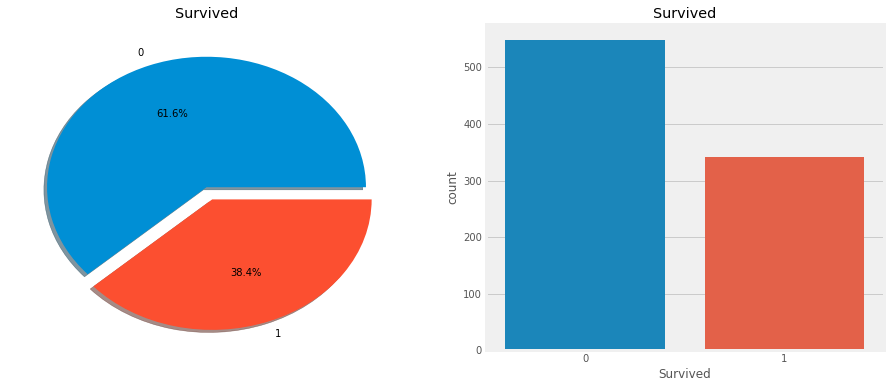

In [86]:
f, ax = plt.subplots(1, 2, figsize=(14, 6)) 
# layouts of subplots, figsize = width, height in inches. If not provided, defaults to rc figure.figsize.
# ax[0] for percent, ax[1] for counts
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash.
We need to dig down more to get better insights from the data and see which categories of the passengers did survive and
who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of
Embarcation, Age, etc.

First let us understand the different types of features.

## Types Of Features
### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables.**

**Categorical Features in the dataset: Sex, Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short,** then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: Pclass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Coninous Features in the dataset:Age**

## Analysing The Features

### Sex --> Categorical Feature

In [93]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [106]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


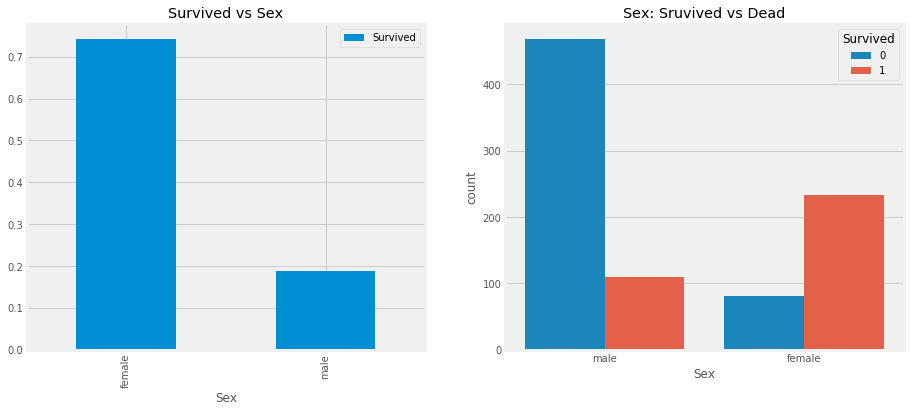

In [111]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Sruvived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

### Pclass --> Ordinal Feature

In [117]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


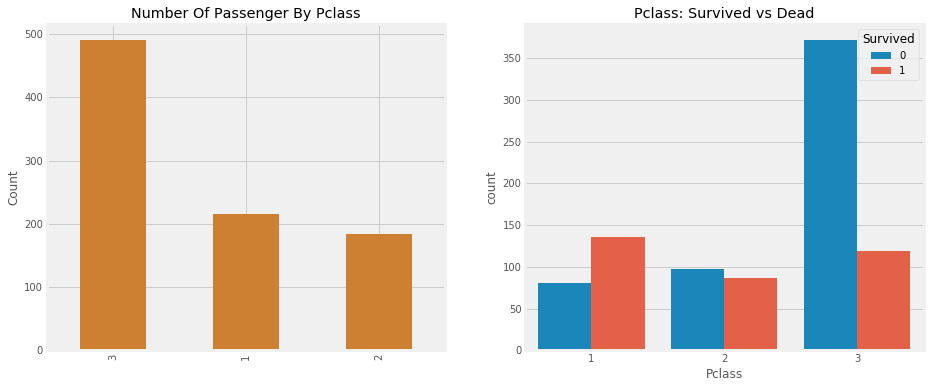

In [125]:
f,ax = plt.subplots(1, 2, figsize=(14, 6))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything.** But we can clearly see that Passengers Of Pcalss 1 were given a very high priority while rescue. Even though the the number of Passengers in Pcalss 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass1 survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pcalss** Together.

In [126]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

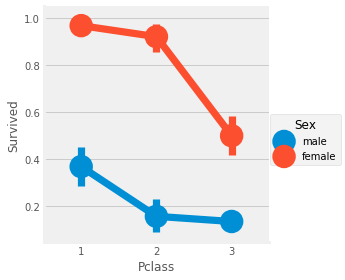

In [131]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

looking at the **Cross Tab** and the **FactorPlot,** we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrenspective of Pclass, Women were given first priority while rescue. Even Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.